In [55]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [56]:
data = pd.read_csv("Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [57]:
data.shape

(400, 11)

In [58]:
label_encoder = preprocessing.LabelEncoder()
data["ShelveLoc"] = label_encoder.fit_transform(data["ShelveLoc"]) 
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['US'] = label_encoder.fit_transform(data['US'])

In [59]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [60]:
x = data.iloc[:,1:]
y = data['Sales'] 
y = label_encoder.fit_transform(data["Sales"])

In [61]:
x.shape

(400, 10)

In [62]:
#set threshold value 200
y = (y > 200).astype(int)

In [63]:
np.unique(y)

array([0, 1])

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42) 

# Decision Tree mode

# Building Decision Tree Classifier using Entropy Criteria

In [65]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

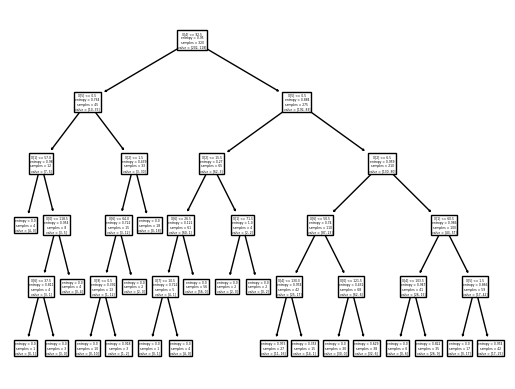

In [66]:
tree.plot_tree(model);

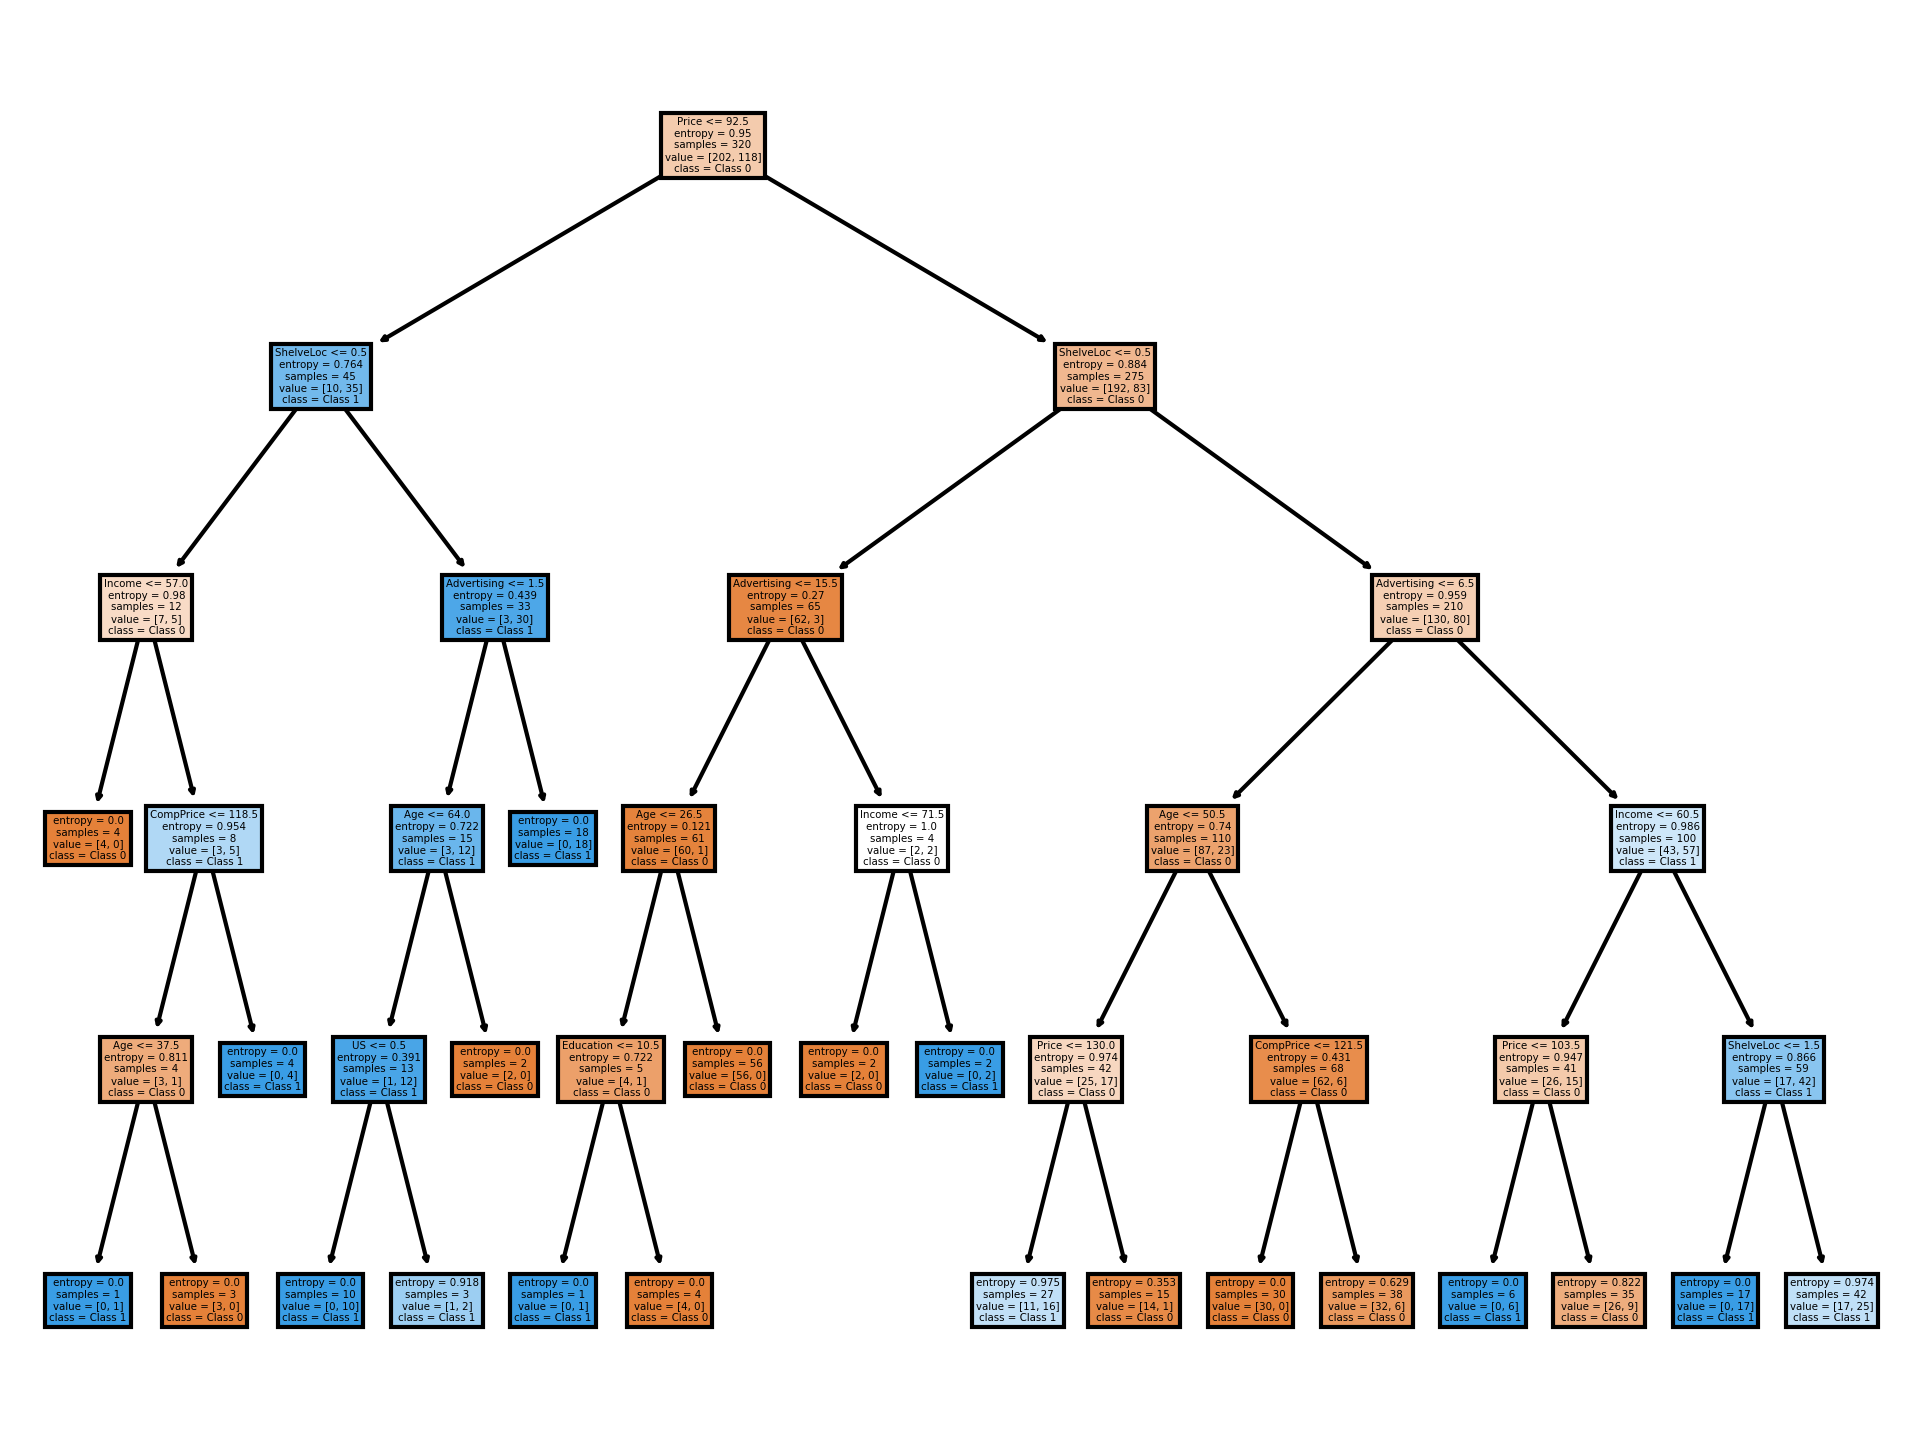

In [67]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,6), dpi=300)
tree.plot_tree(model,feature_names = x.columns, class_names=['Class 0', 'Class 1'],filled = True)
plt.show()

In [69]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_4 <= 92.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_1 <= 57.00
|   |   |   |--- class: 0
|   |   |--- feature_1 >  57.00
|   |   |   |--- feature_0 <= 118.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- feature_0 >  118.50
|   |   |   |   |--- class: 1
|   |--- feature_5 >  0.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- feature_6 <= 64.00
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- feature_6 >  64.00
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  1.50
|   |   |   |--- class: 1
|--- feature_4 >  92.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_2 <= 15.50
|   |   |   |--- feature_6 <= 26.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- feature_6 >  26.50
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  15.50
|   |   |   |--- feature_1 <= 71.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  71.50
|   |   |   |   |--- class: 1
|   |--- feature_5 >  0.50
|   |   |--- fe

In [70]:
model.feature_importances_ 

array([0.05545522, 0.09519451, 0.17750041, 0.        , 0.26078224,
       0.24122669, 0.13607289, 0.02051711, 0.        , 0.01325093])

In [71]:
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False) 
feature_imp

Price          0.260782
ShelveLoc      0.241227
Advertising    0.177500
Age            0.136073
Income         0.095195
CompPrice      0.055455
Education      0.020517
US             0.013251
Population     0.000000
Urban          0.000000
dtype: float64

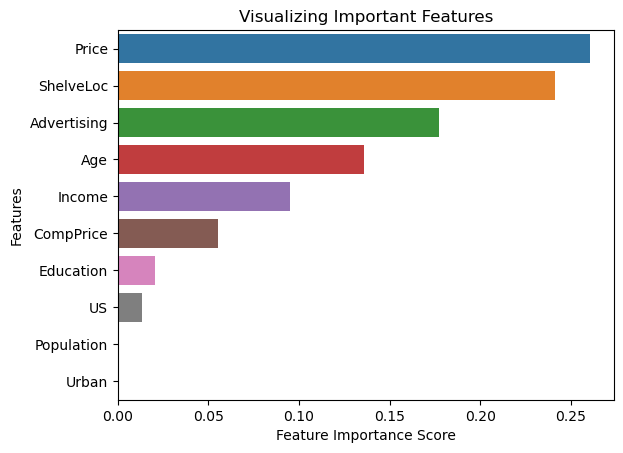

In [72]:
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [73]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    42
1    38
dtype: int64

In [74]:
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [75]:
pd.crosstab(y_test,preds)

col_0,0,1
row_0,,
0,31,15
1,11,23


In [77]:
#accuracy 
np.mean(preds==y_test)

0.675

# Building Decision Tree Classifier (CART) using Gini Criteria

In [86]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [87]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.675

In [88]:
model.feature_importances_ 

array([0.0487531 , 0.        , 0.26591603, 0.        , 0.33910273,
       0.2558847 , 0.09034344, 0.        , 0.        , 0.        ])

Decision Tree Regression

In [89]:
from sklearn.tree import DecisionTreeRegressor  
model = DecisionTreeRegressor(max_depth = 5)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [90]:
model.score(x_test,y_test)     

0.006300425193710546